In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

1. Датасет titanic, разделить на train/test в пропорции 0.7/0.3
2. Предсказать возраст Age на основании других параметров (отберите сами какие)

In [2]:
df = pd.read_csv('titanic.csv')
df.to_excel('titanic.xlsx')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### замена категориальных переменных

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()

In [7]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

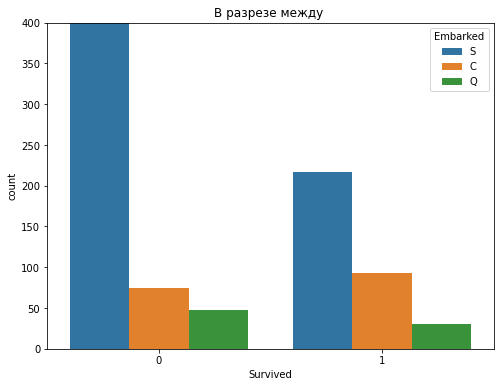

In [8]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='Survived', data=df, hue='Embarked')
ax.set_ylim(0,400)
plt.title("В разрезе между ")
plt.show()

In [9]:
#пустым значениям Embarked присваиваем самое часто встречающееся значение
df.Embarked.fillna(df.Embarked.mode()[0], inplace = True)
df[~df.Embarked.isna()]['Embarked']=le.fit_transform(df[~df.Embarked.isna()]['Embarked'])

In [10]:
df['Embarked'] = le.fit_transform(df['Embarked'])

In [11]:
df['Embarked']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int32

In [12]:
#Значения Pclass и Embarked не коррелируют. Оба столбца можно учитывать в расчете
df['Pclass'].corr(df['Embarked'])

0.16209780442072969

In [13]:
df.Sex = le.fit_transform(df['Sex'])

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit([1, 2, 2, 6])
LabelEncoder()
#le.classes_
#array([1, 2, 6])
le.transform([1, 1, 2, 6])
#array([0, 0, 1, 2])
le.inverse_transform([0, 0, 1, 2])
#array([1, 1, 2, 6])

array([1, 1, 2, 6])

In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0


In [17]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [18]:
round(df.Age.median(),0)

28.0

In [19]:
for i in range(1,4):
    for s in [1,0]:
        print('Class - ',i, ', Sex',s,'=',df[(df.Pclass==i) & (df.Sex==s)]['Age'].median(), ', Кол-во Nan = ',df[(df.Pclass==i) & (df.Sex==s)]['Age'].isna().sum())

Class -  1 , Sex 1 = 40.0 , Кол-во Nan =  21
Class -  1 , Sex 0 = 35.0 , Кол-во Nan =  9
Class -  2 , Sex 1 = 30.0 , Кол-во Nan =  9
Class -  2 , Sex 0 = 28.0 , Кол-во Nan =  2
Class -  3 , Sex 1 = 25.0 , Кол-во Nan =  94
Class -  3 , Sex 0 = 21.5 , Кол-во Nan =  42


In [20]:
df.Age.fillna(round(df.Age.median(),0), inplace = True)

In [21]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace = True)

In [22]:
df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,1,27.0,0,0,13.00,2
887,1,1,0,19.0,0,0,30.00,2
888,0,3,0,28.0,1,2,23.45,2
889,1,1,1,26.0,0,0,30.00,0
890,0,3,1,32.0,0,0,7.75,1


In [27]:
from sklearn.model_selection import train_test_split
df1=df.copy(deep=True)
df1 = df1.drop(['Fare'], axis=1)

In [28]:
RANDOM_SEED=42
X_train, X_test, y_train, y_test = train_test_split(df1.drop('Age',axis=1),
                                                   df1.Age,
                                                   test_size=0.3,
                                                   random_state=RANDOM_SEED
                                                   )

In [29]:
y_train.value_counts(normalize=True)

28.00    0.229535
24.00    0.035313
18.00    0.028892
21.00    0.028892
19.00    0.028892
           ...   
80.00    0.001605
70.50    0.001605
12.00    0.001605
45.50    0.001605
0.83     0.001605
Name: Age, Length: 77, dtype: float64

In [30]:
y_test.value_counts(normalize=True)

28.0    0.220149
36.0    0.037313
22.0    0.037313
29.0    0.029851
30.0    0.029851
          ...   
41.0    0.003731
14.0    0.003731
13.0    0.003731
58.0    0.003731
36.5    0.003731
Name: Age, Length: 65, dtype: float64

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
clf = DecisionTreeClassifier()

In [33]:
y_train = y_train.astype (int)
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
pred = clf.predict(X_test)

In [36]:
check = pd.DataFrame(pred,columns =['Pred'])
tt=y_test
tt=tt.reset_index(drop=True)
check['y_test']=tt

In [38]:
check.to_excel('err.xlsx')

In [39]:
#применил самую простую метрику измерения прогнозирования R^2
from sklearn.metrics import r2_score
print('качество на тесте R^2', r2_score(check['y_test'],check['Pred'],multioutput='variance_weighted'))

качество на тесте R^2 -0.2710054100045409


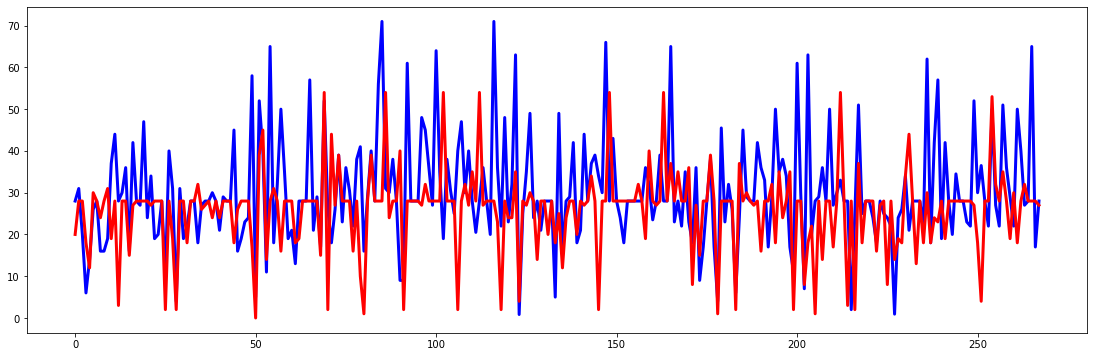

In [40]:
fig, ax=plt.subplots(figsize=(19,6))
plt.plot(check['y_test'], color="blue", linewidth=3)
plt.plot(check['Pred'], color="red", linewidth=3)

## Черновик

In [132]:
df1['Age'].isna().count()

891

In [133]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    int32  
dtypes: float64(1), int32(2), int64(4)
memory usage: 41.9 KB


In [163]:
y_test

709    28.0
439    31.0
840    20.0
720     6.0
39     14.0
       ... 
821    27.0
633    28.0
456    65.0
500    17.0
430    28.0
Name: Age, Length: 268, dtype: float64

In [166]:
tt

709    28.0
439    31.0
840    20.0
720     6.0
39     14.0
       ... 
821    27.0
633    28.0
456    65.0
500    17.0
430    28.0
Name: Age, Length: 268, dtype: float64

In [150]:
arrey(y_test)

NameError: name 'arrey' is not defined

In [138]:
y_train = y_train.astype (int)

In [139]:
y_train

445     4
650    28
172     1
450    36
314    43
       ..
106    21
270    28
860    41
435    14
102    21
Name: Age, Length: 623, dtype: int32